In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
# 패키지 불러오기
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objs as go 
import plotly.express as px

In [4]:
# 사용자 운영체제 확인
import platform
platform.system()

'Linux'

In [5]:
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


font_path = r'C:/Windows/Fonts/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [8]:
#import os, shutil, zipfile
#local_zip = '/content/drive/MyDrive/J4U/자료파일/과학기술정보통신부 우정사업본부_우편물류 정보_20210630.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/content')
#zip_ref.close()

In [90]:
df1 = pd.read_excel("/content/drive/MyDrive/J4U/자료파일/01_parcelServiceLogistics.xlsx")

In [91]:
df_total = df1.iloc[8:13,6:]
df_total.columns= ['연도', '물동량', '전년대비 증감율', '2012년대비 증감율']
df_total['물동량'] = df_total['물동량']*10   # 통계 기준이 10000박스인데 우체국은 1000통 단위라 10을 곱함

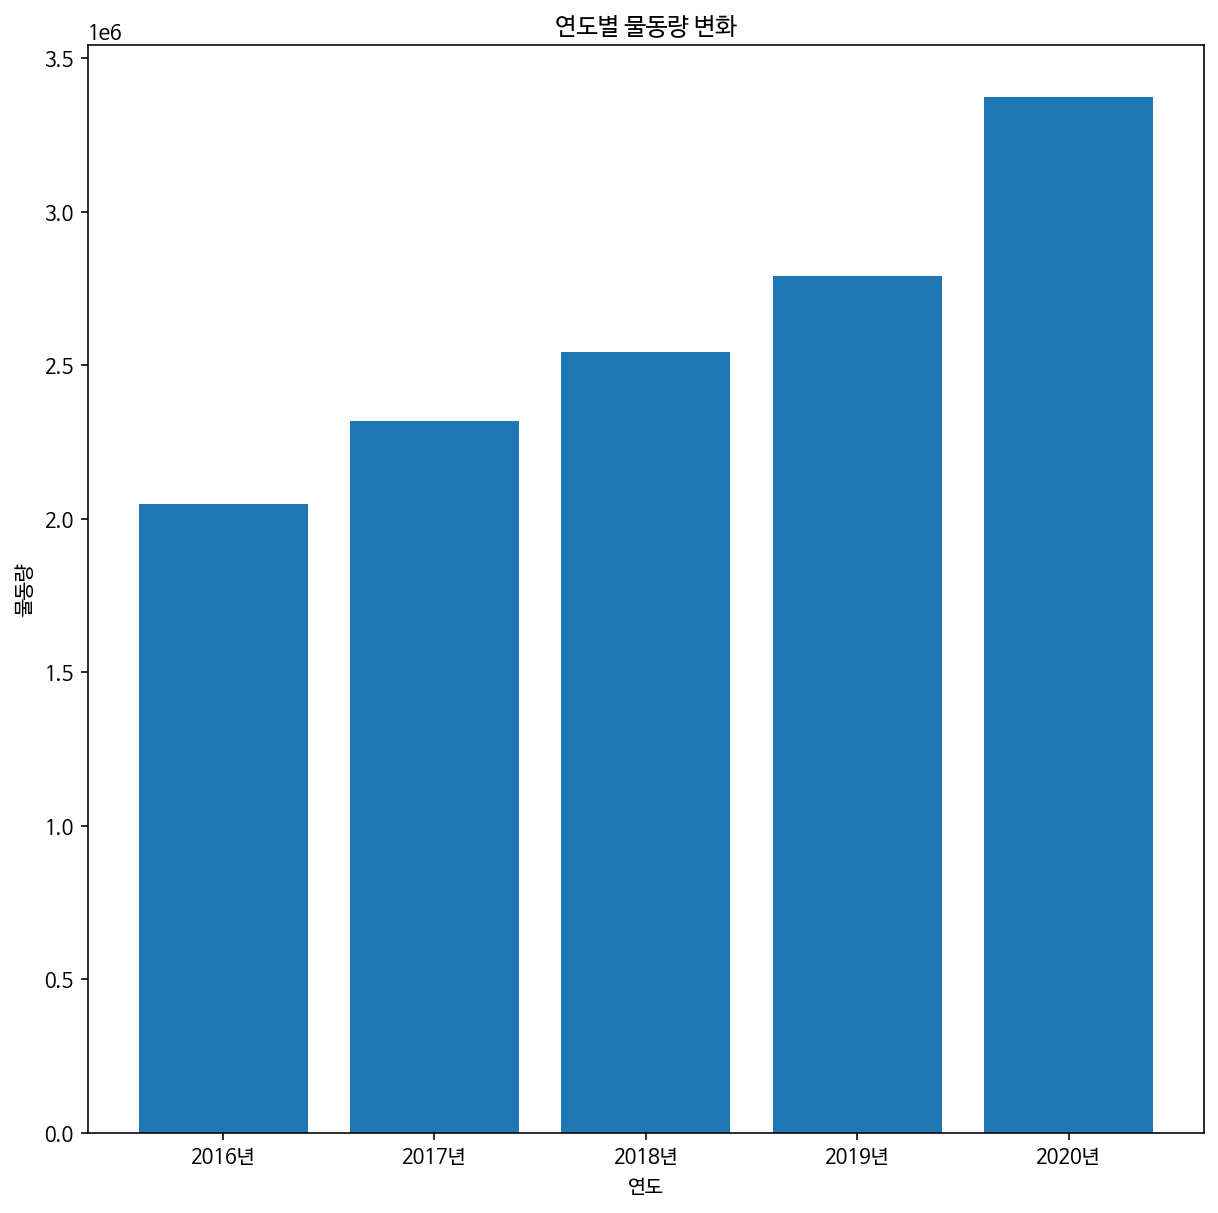

In [92]:
#연도별 물동량 변화

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('연도별 물동량 변화')
plt.bar(df_total['연도'], df_total['물동량'])
plt.xlabel('연도')
plt.ylabel('물동량')
plt.show()

In [78]:
year = df_total['연도'].to_numpy()
year

array(['2016년', '2017년', '2018년', '2019년', '2020년'], dtype=object)

In [79]:
df2 = pd.read_csv("/content/drive/MyDrive/J4U/자료파일/연도별_물량_현황_국내__20211020141748.csv", encoding="euc-kr")
df2

,우편물종별(1),우편물종별(2),2016,2017,2018,2019,2020
0,합계,소계,3874115,3706334,3589622,3398070,3114667
1,일반통상,소계,3378330,3185638,3040933,2801269,2530727
2,특수통상,소계,277339,276986,276156,272449,265150
3,소포,소계,218446,243710,272534,324351,318791
4,소포,보통,1632,1337,1230,1083,1166
5,소포,등기,216814,242373,271304,323268,317625
6,재게 (인터넷우체국),소계,5828,6120,8029,13712,15549


In [80]:
df_post = df2.iloc[3,2:]
df_post = df_post.to_frame().reset_index()
df_post = df_post.rename(columns= {'index':'연도', 3:'물동량'})
df_post

,연도,물동량
0,2016,218446
1,2017,243710
2,2018,272534
3,2019,324351
4,2020,318791


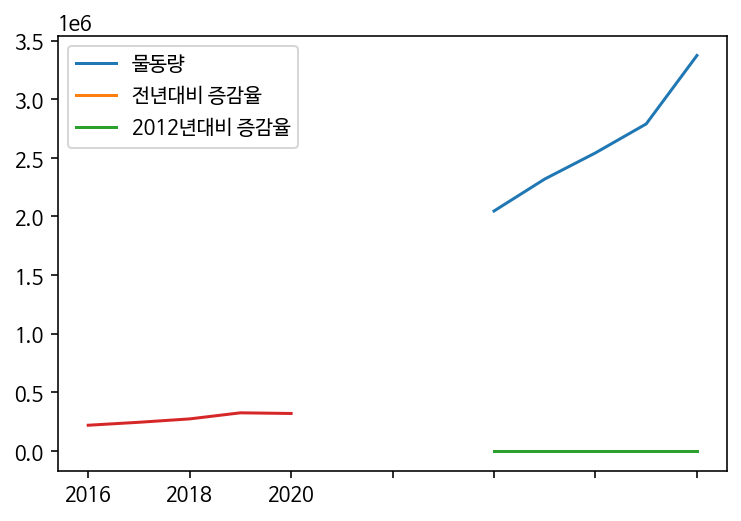

In [93]:
ax = df_total.plot()
df_office.plot(ax=ax)

No handles with labels found to put in legend.


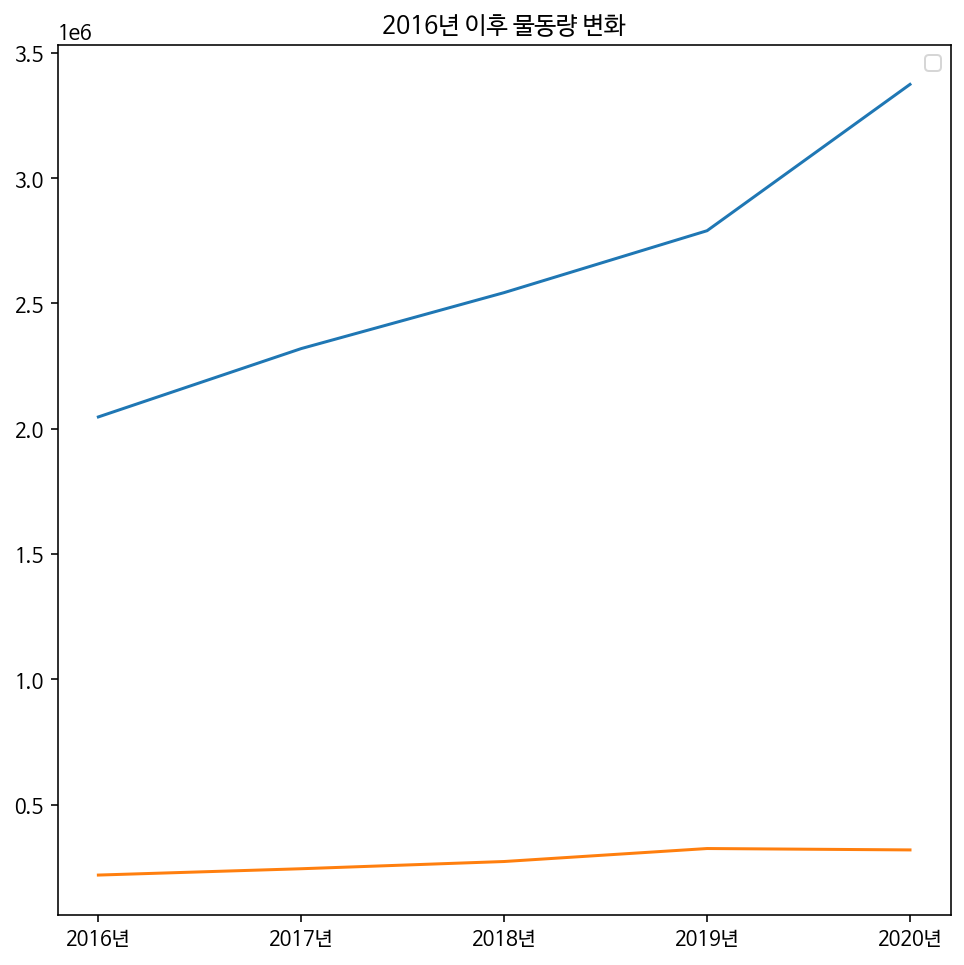

In [95]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(year, df_total['물동량'])
ax.plot(year, df_post['물동량'])

ax.legend()

plt.title('2016년 이후 물동량 변화')
plt.show()